# What is the impact of class imbalance and different sampling methods on the performance of machine learning algorithms for classification?

Class imbalance is a common challenge in many real-world classification problems. Having significantly fewer samples for one class can lead to biasad models that favor the majority class. This results in poor performance in detecting the minority class. In this research project, we investigate the impact of class imbalance on the performance of two popular machine learning algorithms: Support Vector Machines (SVM) and Neural Networks (NN). We compare the in-sample and out-of-sample performance of these algorithms on datasets with varying degrees of class imbalance using different techniques to adress this issue. Our goal is to provide insights into strengths and weaknesses of each algorithm and to identify the effective approach.


# Support Vector Machines

# Neural Networks

# Random under-sampling & random over-sampling

The most naive class of techniques for dealing with class imbalances is sampling. Random under-sampling involves removing some of the majority class samples at random until the dataset is balanced. Whereas random over-sampling involves duplicating some of the minority class samples at random until the dataset is balanced.

# SMOTE

SMOTE is a more sophisticated technique that generates synthetic samples for the minority class based on the characteristics of that class. This helps to balance the classes while preserving the information in the dataset.

# The impact of class imbalance, comparing Support Vector Machines with Neural Networks

In [3]:
#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn


from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

#from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.pipeline import make_pipeline


In [4]:
# 3 of 8 random state
def create_dataset(weights, n_samples, n_classes,
                   class_sep, n_clusters):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=5)

In [5]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

# SYNTHETIC DATASET

Class imbalance refers to a situation where the number of samples in different classes of a dataset is significantly uneven. This can have an impact on the decision boundary learned by a machine learning model, potentially leading to biased or skewed predictions. To illustrate the impact of class imbalances on the decision boundry we generated 4 synthetic datasets. Each set contains 2 classes but the level of imbalance vary.

1. Very unbalanced dataset: \
One class is heavily overrepresented, while the other class is underrepresented. This extreme class imbalance can make it challenging for a model to accurately learn the minority class, as the decision boundary may prioritize the majority class.
2. Unbalanced dataset: \
The majority class is still overrepresented but the imbalance is not as extreme as the very unbalanced dataset. The decision boundary in this case may show some consideration for the minority class, but it still is influenced by the majority class.
3. Moderate unbalanced dataset \
This dataset still exhibits a noticeable class imbalance, but to a lesser extent compared to the previous dataset.  The decision boundary learned by a model on this dataset may be more balanced, giving reasonable consideration to both classes.
4. Balanced Dataset: \
The last dataset is balanced, with an equal number of samples in each class. There is no class imbalance present, and the decision boundary learned by a model on this dataset should ideally provide fair and accurate predictions for both classes.

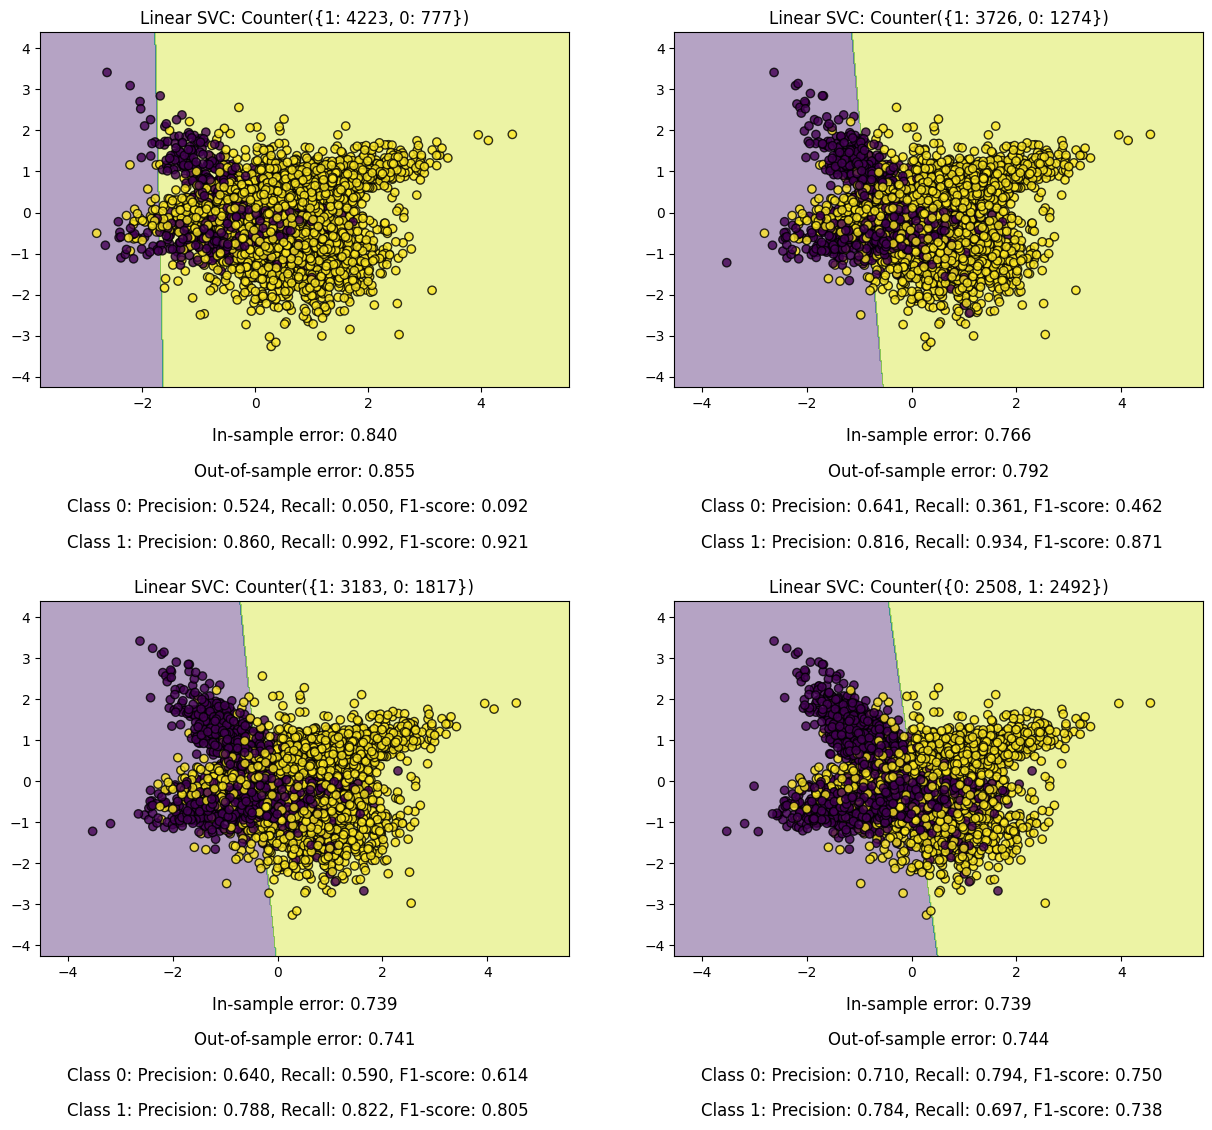

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.15, 0.85), (0.25, 0.75),
               (0.36, 0.64), (0.5, 0.5))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=2,
                   class_sep=0.5, n_clusters=2)
 
    ax.set_title('Linear SVC: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LinearSVC().fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)




When working with imbalanced datasets it is important not only to look at the in and out of sample error as a metric to evaluate the performance of the model. Due to the class imbalance, these metrics can be misleading and do not reflect how well the model is handling the minority class. 
Precision is the ratio of true positives to all the positves. It measures the model's ability to correctly identify positive instances. A high precision indicates a low rate of false positive predictions.
Recall on the other hand is the ratio of true positives to sum of true positives and false negatives. It measures the model's abilility to correctly identify true positive instances. It is also called the Sensitivity or the True Positive Rate. A high recall indicates a low rate of false negatives.
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance on both precision and recall. 
These metrics provide a more nuanced understanding of how well the model is performing on imbalanced datasets as they can highlight the model's ability to handle the minority class.


By looking at the in and out of sample error we can conclude that the model predicting the most unbalanced dataset scored best. The precision of the majority class is both around .9 indicating is has a low rate of false positives and negatives. The model is able to accuratly predict the majority class. Because the class is very unbalanced this means the model is able correctly classifiy the larger majority of the dataset leading to an in and out of sample error of approximately 0.85. However, the precision of the minority class is only 0.524 indicating the model correctly predicts an instance as positive, around 50% of the time. Toghether with a recall close to zero,  it means the model is failing to capture the positive instances, in this case the minority class. (this model would be dramatic for real world datasets kanker en heart disease).

As the datasets gets slightly more balanced the precision and recall of minority class improves while keeping the same precision and recall for the majority set. This indicates that balancing the dataset allows the model to have a better opportunity to learn from both classes.



# Neural Nets

In [10]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Eliminates warnings
#anders altijd warning omdat model niet meer converged

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.6)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.15, 0.85), (0.25, 0.75),
               (0.4, 0.6), (0.5, 0.5))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=2, class_sep=0.5, n_clusters=2)
 
    ax.set_title('Neural Net Classification: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Neural Net
    
    params = {
        'hidden_layer_sizes': (40, 100, 80),
        'random_state' : 20,
        'max_iter': 1000,
        'n_iter_no_change' : 200
    }
    clf = MLPClassifier(**params, activation='relu').fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

Error in callback <function _draw_all_if_interactive at 0x7fd2481527a0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7fd2301fcaf0> (for post_execute):


KeyboardInterrupt: 

# OVERSAMPLING - Linear Support Vector Classification

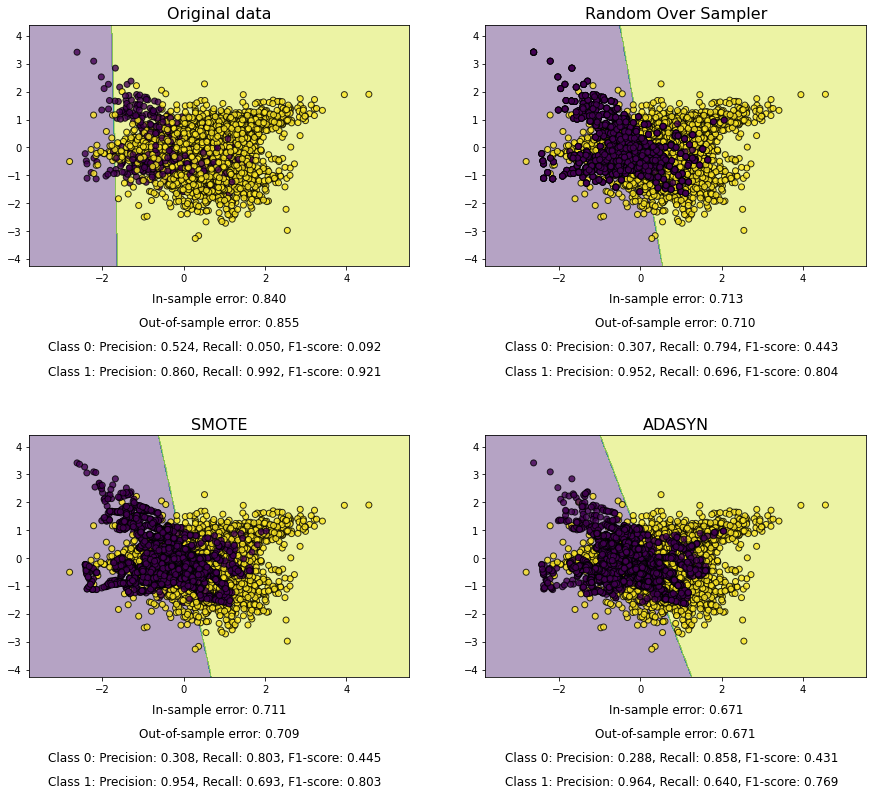

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.15, 0.85), n_samples=5000, n_classes=2,
                   class_sep=0.5, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    clf = LinearSVC()
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    model = clf.fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    
    ax.set_title(title, fontsize=16)
    
        
    #plot_decision_function(X, y, clf, ax) 
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

# OverSampling - Neural Network

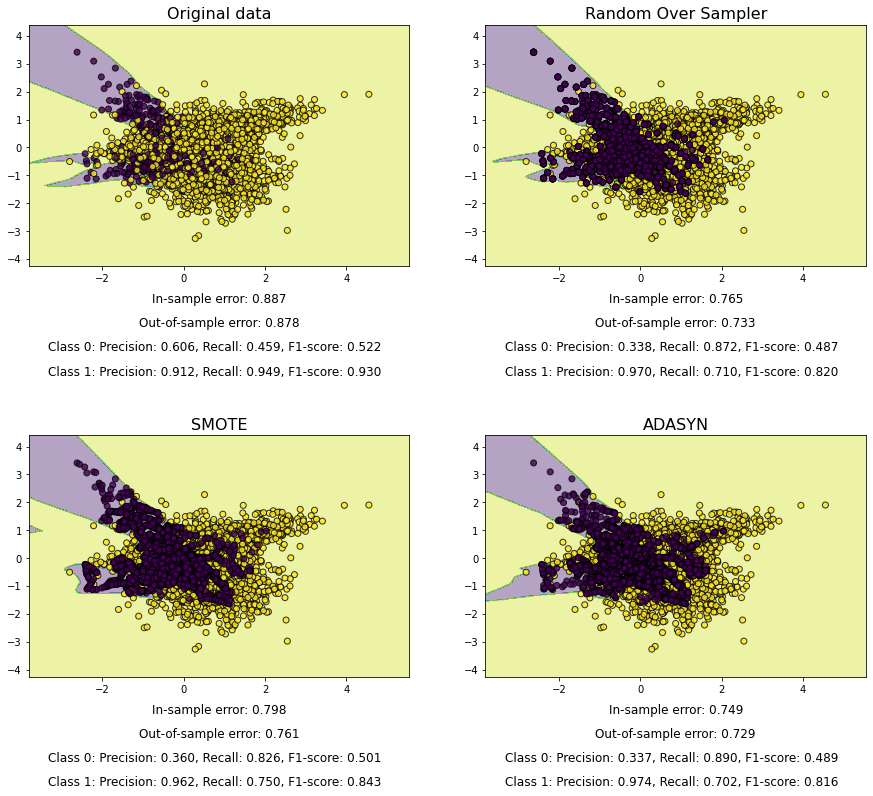

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.15, 0.85), n_samples=5000, n_classes=2,
                   class_sep=0.5, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    params = {
        'hidden_layer_sizes': (40, 100, 80),
        'random_state' : 20,
        'max_iter': 1000,
        'n_iter_no_change' : 200
    }
    clf = MLPClassifier(**params, activation='relu').fit(X_train, y_train)
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    model = clf.fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    
    ax.set_title(title, fontsize=16)
    
        
    #plot_decision_function(X, y, clf, ax) 
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)